<a href="https://colab.research.google.com/github/chelseaangeles/programming-assignment-4/blob/main/Programming_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programming Assignment 4: Support Vector Machine**
> Group Members:
1. Angeles, Chelsea R.
2. Soriano, Adelyn Joyce S.

In this assignment, you will train a classifier using Support Vector Machine (SVM) to predict whether a breast tumor is benign (0) or malignant (1).

###**Dataset**
We will use the Breast Cancer Wisconsin dataset, built into sklearn.datasets. The dataset contains 569 samples of breast tumors, with 30 numerical features, including:

* Mean radius
* Mean texture
* Mean perimeter
* Mean area
* Mean smoothness, etc.

The target variable (y) represents tumor status:
* 0 = Benign
* 1 = Malignant

# **General Guidelines**

---



## **1. Load the dataset**
Loading dataset is important because it provides the raw data needed for analysis, and training machine learning models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.feature_selection import SelectFromModel

# Load dataset
cancer = load_breast_cancer()
print(cancer.keys())

X = cancer.data
y = cancer.target

# Convert to pandas DataFrame and Series
X_df = pd.DataFrame(X, columns = cancer.feature_names)
y_series = pd.Series(y, name = 'target')

# Display the Features and Target
print("Features (X):")
display(X_df.head())  # Show first few rows of feature set

print("\nTarget (y):")
display(y_series.head())  # Show first few rows of target set

# Extract the target labels from the dataset without mapping them to their corresponding label names
targets = cancer['target']
display(targets)
print(cancer['target_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Features (X):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Target (y):


,target
0,0
1,0
2,0
3,0
4,0


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

['malignant' 'benign']


## **2. Split the dataset into 70% Training and 30% Testing**
A common ratio of 70% training and 30% testing balances the need for sufficient training data while keeping enough samples for validation. Splitting the dataset into training and testing sets is essential to evaluate the model’s ability to generalize new, unseen data.

In [ ]:
# Split dataset (70% training, 30% testing, maintaining class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Converting y to pandas Series
y_series = pd.Series(y, name='Target')
y_train_series = pd.Series(y_train, name='Train Target')
y_test_series = pd.Series(y_test, name='Test Target')

# Display distribution
print("Original Dataset Distribution:")
display(y_series.value_counts().rename(index = {0: 'Benign', 1: 'Malignant'}))

print("\nTraining Set Distribution:")
display(y_train_series.value_counts().rename(index = {0: 'Benign', 1: 'Malignant'}))

print("\nTesting Set Distribution:")
display(y_test_series.value_counts().rename(index = {0: 'Benign', 1: 'Malignant'}))

Original Dataset Distribution:


,count
Target,
Malignant,357
Benign,212



Training Set Distribution:


,count
Train Target,
Malignant,250
Benign,148



Testing Set Distribution:


,count
Test Target,
Malignant,107
Benign,64


## **3. Preprocess the data**
Support Vector Machines (SVMs) are sensitive to feature scaling because they rely on distance-based calculations, which can end up neglecting variables with larger ranges. To address this, `StandardScaler` standardizes each feature to have a mean of 0 and a standard deviation of 1.

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **4. Train an SVM model using sklearn.svm.SVC with default parameters**
Training an SVM model with default parameters establishes a baseline performance to help evaluate the model's effectiveness before applying optimizations such as hyperparameter tuning.

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)  # Train SVM model
default_accuracy = svm.score(X_test, y_test)  # Compute accuracy
print(f"Default Model Accuracy: {default_accuracy:.4f}")

Default Model Accuracy: 0.9766


## **5. Perform Hyperparameter Tuning using GridSearchCV**
GridSearchCV helps find the best combination of hyperparameters for the SVM model by testing different values and selecting the one with the highest accuracy.

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Kernel types
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)  # 5-fold cross-validation
grid.fit(X_train, y_train)

# Best parameters and model
y_pred = grid.best_estimator_.predict(X_test)
print("Best Parameters:")
for param, value in grid.best_params_.items():
    print(f"  {param}: {value}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

## **6. Evaluate the trained model**
Evaluating the trained model is necessary to measure its performance, identify strengths and weaknesses, and ensure it generalizes well to unseen data. This helps determine if improvements, such as adjusting hyperparameters or using different features, are needed.

MODEL ACCURACY
Training Accuracy: 0.9874
Testing Accuracy : 0.9708
FEATURE IMPORTANCE
Selected Important Features:
  - mean compactness
  - mean concavity
  - mean fractal dimension
  - perimeter error
  - area error
  - compactness error
  - concavity error
  - worst radius
  - worst texture
  - worst perimeter
  - worst area
  - worst concavity


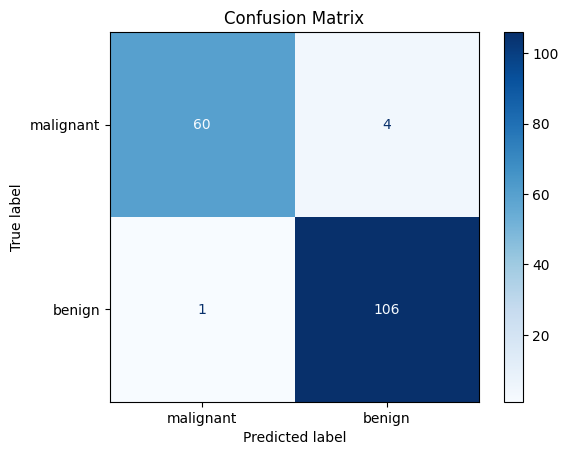

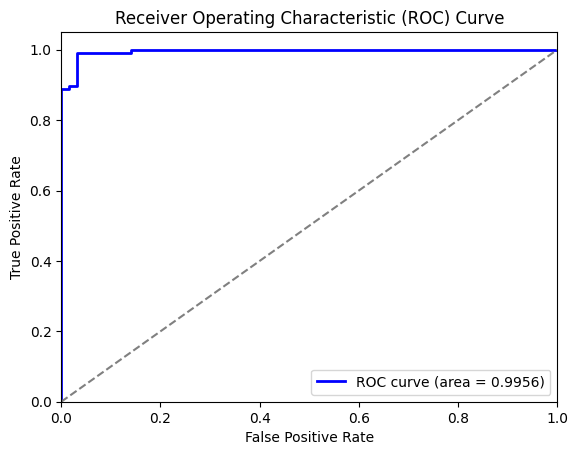

CLASSIFICATION METRICS
False Alarm Rate: 0.0625
Precision: 0.9636
Recall: 0.9907
F1 Score: 0.9770
ROC AUC Score: 0.9956


In [ ]:
# Compute accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, grid.best_estimator_.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("MODEL ACCURACY")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy : {test_accuracy:.4f}")

# Feature importance using SelectFromModel (only for linear kernels)
print("FEATURE IMPORTANCE")
linear_svm = SVC(kernel='linear', C=grid.best_params_['C'])  # Retrain with best C value
linear_svm.fit(X_train, y_train)
selector = SelectFromModel(linear_svm, prefit=True)
selected_features = np.array(cancer.feature_names)[selector.get_support()]
print("Selected Important Features:")
for feature in selected_features:
    print(f"  - {feature}")

# Confusion matrix and classification metrics
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=cancer.target_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Extract confusion matrix values
TN, FP, FN, TP = conf_matrix.ravel()
false_alarm_rate = FP / (FP + TN) if (FP + TN) != 0 else 0  # Prevent division by zero
precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Prevent division by zero
recall = TP / (TP + FN) if (TP + FN) != 0 else 0  # Prevent division by zero
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0  # Prevent division by zero

# ROC Curve
svm_prob = grid.best_estimator_.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, svm_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print performance metrics
print("CLASSIFICATION METRICS")
print(f"False Alarm Rate: {false_alarm_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# **Guide Questions**



---



### **1. How did you preprocess the dataset (feature scaling, handling missing values if any, etc.)?**
*   For feature scaling `StandardScaler` is used to normalize the feature values. `StandardScaler` transforms the dataset so that each feature has mean 0 and variance 1.
*   Stratified splitting is performed to maintain class distribution in training and testing sets.
*   There were no missing values in the Breast Cancer Wisconsin dataset.

### **2. Why is it necessary to split the dataset into training and testing sets?**
*   Splitting the dataset into training and testing sets helps the model learn from one part of the data and be tested on another. This prevents overfitting and ensures that the model performs well on new data.
  *   Training set is used to train the model and adjust its parameters.
  *   Testing set is used to evaluate how well the model generalizes to new data.
*   A 70/30 split is standard to provide enough data for training while reserving sufficient data for testing.



### **3. What is the role of `StandardScaler` in SVM training?**


* StandardScaler ensures that all features are on the same scale by transforming them to have a mean of 0 and variance of 1. Since SVM relies on distance-based calculations, unscaled data could cause features with larger values to dominate the model.
* The code,
```
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```
improves convergence speed and helps the SVM find an optimal hyperplane more efficiently.




### **4. How does C affect the performance of an SVM model?**


* The C parameter in SVM controls the trade-off between maximizing the margin and minimizing misclassification:
  * Low C: A larger margin is allowed, which leads to a better generalization but permitting some misclassifications.
  * High C: The model tries to classify every training example correctly, which reduces bias but increases the risk of overfitting.
* The code,
```
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001],  
    'kernel': ['linear', 'rbf', 'poly']
}
```
allows GridSearchCV to find the best C value for optimal performance.


### **5. What is the purpose of the kernel function in SVM?**

* The kernel function in SVM maps input data into a higher-dimensional space where it can be more easily separated. Different kernels serve different purposes:
  * Linear kernel (linear) works well when the data is already linearly separable. It is computationally efficient.
  * Basis Function (rbf) is best for non-linear decision boundaries and can capture complex relationships in data.
  * Polynomial kernel (poly) models higher-order interactions between features, and useful for problems where relationships are more structured.
* The code,
```
'kernel': ['linear', 'rbf', 'poly']
```
allows GridSearchCV to test different kernels and determine which one provides the best classification performance.


### **6. What were the best hyperparameters found using GridSearchCV?**

* The best hyperparameters were determined using GridSearchCV, which performed 5-fold cross-validation to test different values of C, gamma, and kernel, selecting the combination that achieved the highest performance.
* The code,
```
print("Best Parameters:")
for param, value in grid.best_params_.items():
    print(f"  {param}: {value}")
```
outputs the best parameters.
```
Best Parameters:
  C: 10
  gamma: 0.001
  kernel: rbf
```
This means the best-performing model used:
C = 10: A higher regularization strength, which reduces bias and allows the model to fit more complex patterns.
Gamma = 0.001: Controls the influence of a single training example; a lower value prevents overfitting by making the decision boundary smoother.
Kernel = 'rbf': The Radial Basis Function (RBF) kernel, which is effective in capturing non-linear relationships in the data.

### **7. What is a confusion matrix, and how is it interpreted?**

*   A confusion matrix is a table that shows the comparison between the True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN) that the model predicted and the actual data.
*   For this dataset there are 2 classification; benign and malignant. 62 out of 64 malignant were predicted to be malignant (TP), 105 out of 107 benign were predicted to be benign (TP).

### **8. How are Precision, Recall, and F1-score calculated from the confusion matrix?**

* Given `TP` as True Positive, `TN` as True Negative, `FP` as False Positive, and `FN` as False Negative:

$$\text{Accuracy}=\frac{TP+TN}{TP+FP+FN+TN}$$

$$\text{Precision} = \frac{TP}{TP+FP}$$

$$\text{Recall} = \frac{TP}{TP+FN}$$

$$\text{F1-Score} = 2 \times \frac{\text{Precision}\cdot\text{Recall}}{\text{Precision}+\text{Recall}}$$

### **9. If the model does not perform well, what adjustments can be made to improve it?**
*   Adjust C, gamma, and kernel using GridSearchCV to improve model performance.
*   Scale features properly to ensure the model treats all variables equally.
*   Remove unnecessary features to focus on the most relevant data.
*   Lower C to allow more misclassifications if the model is overfitting.
*   Increase C and gamma if the model is too simple and underfitting.

# **Brief Interpretation of Key Insights Discovered**



---



The objective of this assignment was to train an SVM classifier to predict whether a breast tumor is benign (0) or malignant (1) using the **Breast Cancer Wisconsin** dataset. The dataset was loaded using `sklearn.datasets.load_breast_cancer()`, and `StandardScaler` was applied to normalize features since SVM models are sensitive to scale. The data was split into 70% training and 30% testing, ensuring balanced class distribution with `stratify=y`. An initial SVM model was trained using `SVC()` with default parameters, providing a baseline performance. To improve accuracy, `GridSearchCV` was used to optimize C (regularization strength), gamma (kernel coefficient), and kernel type, finding the best model with:

*   C = 10
*   gamma = 0.001
*   kernel = rbf

The optimized model achieved **97.66%** accuracy, evaluated through a confusion matrix, precision, recall, and F1-score, ensuring minimal false positives and false negatives. A high ROC-AUC score confirmed strong predictive ability. Since rbf kernels do not provide feature importance scores, linear SVM with `SelectFromModel` identified key features only for linear kernels. Results were visualized using a confusion matrix and an ROC curve for interpretability. As seen in the confusion matrix, the model predicted an average of 97% of both classifications correctly, indicating high accuracy, which is also evident in the ROC Curve graph. The systematic approach of preprocessing, training, tuning, and evaluation successfully met the objective, producing a highly accurate and reliable classifier for breast cancer prediction.